In [9]:
from EXP4_clean_balance import clean_and_balance_csv_files  # Import the function
combined_metrics, combined_deleted_df, balanced_dataframes = clean_and_balance_csv_files()
### PURPOSE: Save final balanced dataframe into finalEXP4.csv ###


📂 Processing file: /hpcstor6/scratch01/h/huuthanhvy.nguyen001/EXP4/finetuning-EXP4numberthree/EXP-Results/EXP4evaluate55images.csv
DataFrame columns: Index(['task_name', 'query', 'run', 'model_name', 'image_path', 'ground_truth',
       'raw_answer', 'time_ms'],
      dtype='object')
Task framed: 55 unique images
Task unframed: 55 unique images
Rows before cleaning:
  📥 Total rows: 1650
Total tasks: 1650
Rows deleted: 52
Deleted rows:
Task framed rows: 803
Task unframed rows: 795
After balancing: Framed=784, Unframed=784

✅ Final cleaned dataset saved as 'finalEXP4.csv'


#### Step 1: Caculate average MLAE

In [2]:
import pandas as pd

# Load dataset
EXP4 = pd.read_excel("finalEXP4.xlsx")
print("total number rows:", len(EXP4))

EXP4.head(3)


total number rows: 4704


,task_name,query,run,model_name,image_path,ground_truth,raw_answer,time_ms,cleaned_answers,type
0,framed,Estimate the lengths of the two bars with fram...,3,Gemini1_5Flash,/hpcstor6/scratch01/h/huuthanhvy.nguyen001/EXP...,"[49.0, 52.0]","[52, 56]\n",5407.310963,"[52.0, 56.0]",framed
1,framed,Estimate the lengths of the two bars with fram...,3,Gemini1_5Flash,/hpcstor6/scratch01/h/huuthanhvy.nguyen001/EXP...,"[59.0, 56.0]","[52, 56]\n",5409.944296,"[52.0, 56.0]",framed
2,framed,Estimate the lengths of the two bars with fram...,1,GeminiProVision,/hpcstor6/scratch01/h/huuthanhvy.nguyen001/EXP...,"[51.0, 60.0]","[55, 50]\n",5722.790480,"[55.0, 50.0]",framed


In [3]:
import sys

sys.path.append('/home/huuthanhvy.nguyen001/tmp/LLMP/ALLSummary/NewSummary/')

from statiscaltesting import calculate_average_mlae_EXP4, calculate_mlae_individual_EXP4, perform_statistical_testing
# Run function and get metrics
average_mlae = calculate_average_mlae_EXP4(EXP4)
average_mlae

,Dataset,Model,Average MLAE,Average MAE,Std MLAE,Confidence Interval (95%)
0,framed,CustomLLaMA,1.50,4.02,1.60,3.14
1,framed,Gemini1_5Flash,1.03,3.04,1.74,3.41
2,framed,GeminiProVision,1.02,2.80,1.56,3.05
3,framed,LLaMA,1.67,6.98,1.95,3.83
4,framed,gpt4o,1.18,3.09,1.51,2.97
5,unframed,CustomLLaMA,1.41,3.80,1.62,3.17
6,unframed,Gemini1_5Flash,1.24,3.07,1.46,2.85
7,unframed,GeminiProVision,1.22,3.08,1.48,2.90
8,unframed,LLaMA,1.86,7.97,1.87,3.67
9,unframed,gpt4o,1.29,3.30,1.50,2.94


In [4]:
average_mlae

,Dataset,Model,Average MLAE,Average MAE,Std MLAE,Confidence Interval (95%)
0,framed,CustomLLaMA,1.50,4.02,1.60,3.14
1,framed,Gemini1_5Flash,1.03,3.04,1.74,3.41
2,framed,GeminiProVision,1.02,2.80,1.56,3.05
3,framed,LLaMA,1.67,6.98,1.95,3.83
4,framed,gpt4o,1.18,3.09,1.51,2.97
5,unframed,CustomLLaMA,1.41,3.80,1.62,3.17
6,unframed,Gemini1_5Flash,1.24,3.07,1.46,2.85
7,unframed,GeminiProVision,1.22,3.08,1.48,2.90
8,unframed,LLaMA,1.86,7.97,1.87,3.67
9,unframed,gpt4o,1.29,3.30,1.50,2.94


#### Step 2: Plot average MLAE

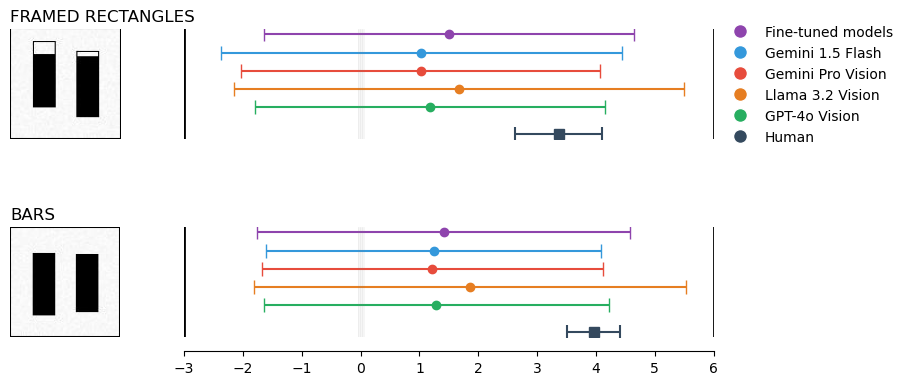

In [5]:
from EXP4_plot_results import plot_results

plot_results(average_mlae)

#### Step 3: Perform Statiscal Testing 

- Each error

In [6]:
mlae_individual = calculate_mlae_individual_EXP4()

perform_statistical_testing(mlae_individual)


🔬 O'Brien Test for Homogeneity of Variances:
F-statistic: 22.5875
P-value: 1.6723e-18
⚠️ Variances are not equal (heteroscedasticity detected). Using Welch’s ANOVA.

📊 Welch's ANOVA Results:
       Source  ddof1        ddof2          F         p-unc       np2
0  model_name      4  2324.863249  32.507827  2.098008e-26  0.028276
⚠️ Significant result: p-value = 2.0980e-26 (p < 0.01)

🔬 Performing Tukey's HSD Post-hoc Test...

📊 Tukey's HSD Post-hoc Test Results:
         Multiple Comparison of Means - Tukey HSD, FWER=0.01          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
    CustomLLaMA  Gemini1_5Flash  -0.5058    0.0 -0.7208 -0.2908   True
    CustomLLaMA GeminiProVision  -0.4318    0.0 -0.6466  -0.217   True
    CustomLLaMA           LLaMA   0.0681 0.8549 -0.1533  0.2894  False
    CustomLLaMA           gpt4o  -0.4806    0.0 -0.6991 -0.2621   True
 Gemini1_5Flash GeminiProVision    0.

#### Step 4: Display unique answers

In [7]:
# Load dataset
import pandas as pd
EXP4 = pd.read_excel("finalEXP4.xlsx")
print("total number rows:", len(EXP4))

total number rows: 4704


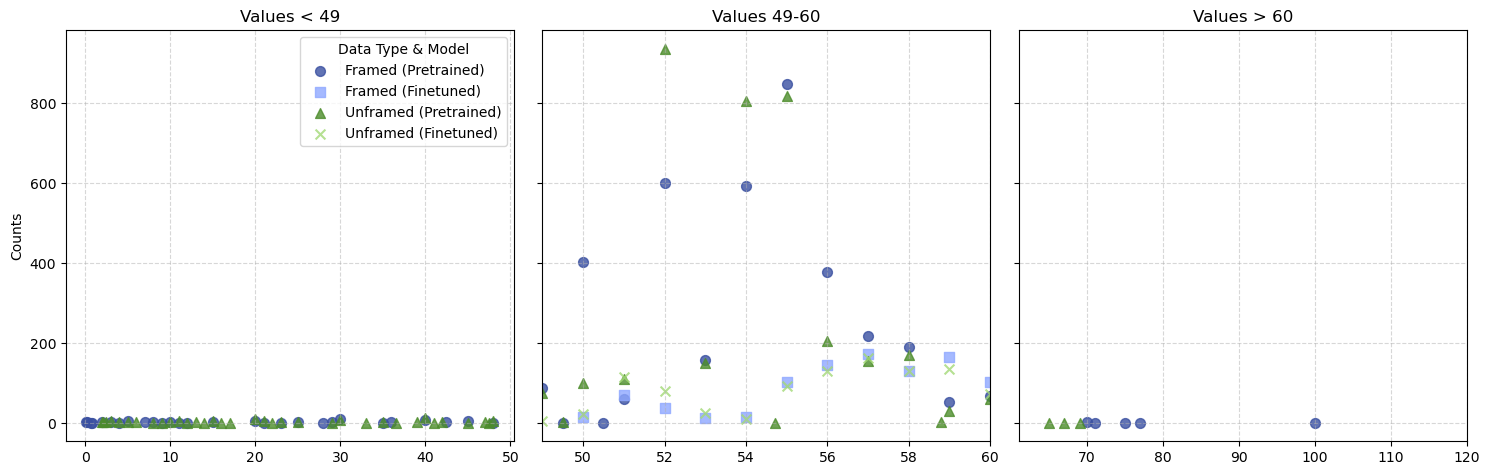

{('framed',
  'Pretrained'): cleaned_answers
 0.10        2
 0.20        2
 0.70        1
 0.80        1
 2.00        3
 3.00        2
 4.00        1
 5.00        4
 7.00        3
 8.00        2
 9.00        1
 10.00       3
 11.00       1
 12.00       1
 15.00       3
 20.00       5
 21.00       1
 23.00       1
 25.00       3
 28.00       1
 29.00       2
 30.00      11
 35.00       1
 36.00       3
 40.00       8
 42.43       2
 45.00       5
 48.00       1
 49.00      88
 49.50       1
 50.00     402
 50.50       1
 51.00      60
 52.00     600
 53.00     158
 54.00     593
 55.00     848
 56.00     377
 57.00     217
 58.00     190
 59.00      52
 60.00      67
 70.00       2
 71.00       1
 75.00       1
 77.00       1
 100.00      1
 311.00      1
 312.00      1
 Name: count, dtype: int64,
 ('framed',
  'Finetuned'): cleaned_answers
 50.0     16
 51.0     70
 52.0     38
 53.0     13
 54.0     16
 55.0    102
 56.0    146
 57.0    172
 58.0    129
 59.0    164
 60.0    102
 Name

In [10]:
from EXP4_clean_balance import check_combined_unique_answers_overlay  # Import the function

check_combined_unique_answers_overlay(balanced_dataframes)